# Dataset Info

1 Company- String -Laptop Manufacturer

2 Product -String -Brand and Model

3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)

4 Inches -Numeric- Screen Size

5 ScreenResolution -String- Screen Resolution

6 Cpu- String -Central Processing Unit (CPU)

7 Ram -String- Laptop RAM

8 Memory -String- Hard Disk / SSD Memory

9 GPU -String- Graphics Processing Units (GPU)

10 OpSys -String- Operating System

11 Weight -String- Laptop Weight

12 Price_euros -Numeric- Price (Euro)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/laptop_price (1).csv', encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#Data Cleaning and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.shape

(1303, 13)

In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [ ]:
# missing values
df.isnull().sum()


,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# drop laptop id column
df = df.drop('laptop_ID', axis=1)

In [ ]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
# Ram cleaning
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
# Weight cleaning
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
df['Ram'].value_counts()

,count
Ram,
8,619
4,375
16,200
6,41
12,25
2,22
32,17
24,3
64,1


In [ ]:
# Convert Price_euros to Indian Rupees
df['Price'] = (df['Price_euros'] * 103.57).round()

In [ ]:
# drop price_euros column
df = df.drop('Price_euros', axis = 1)

# Exploratory Data Analysis(EDA)

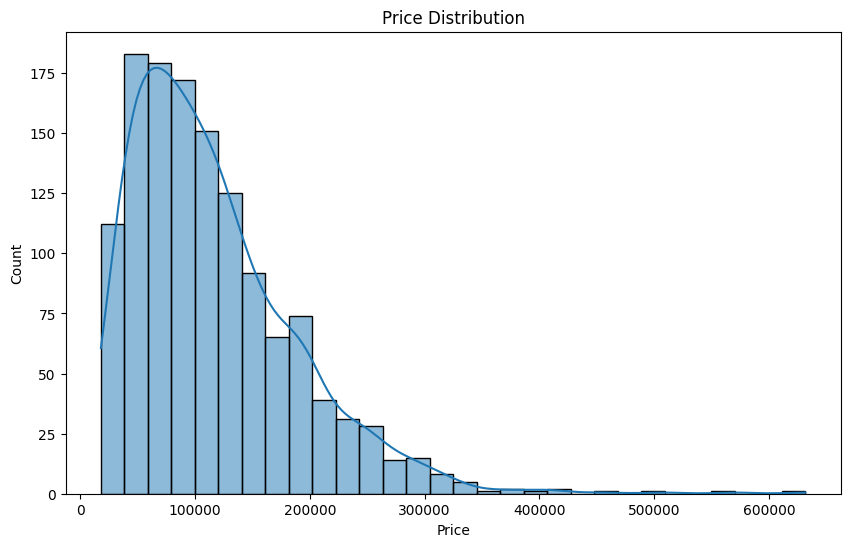

In [ ]:
# plot price distribution
plt.figure(figsize = (10,6))
sns.histplot(df['Price'], bins = 30, kde = True)
plt.title('Price Distribution')
plt.show()

Text(0.5, 1.0, 'Company distribution')

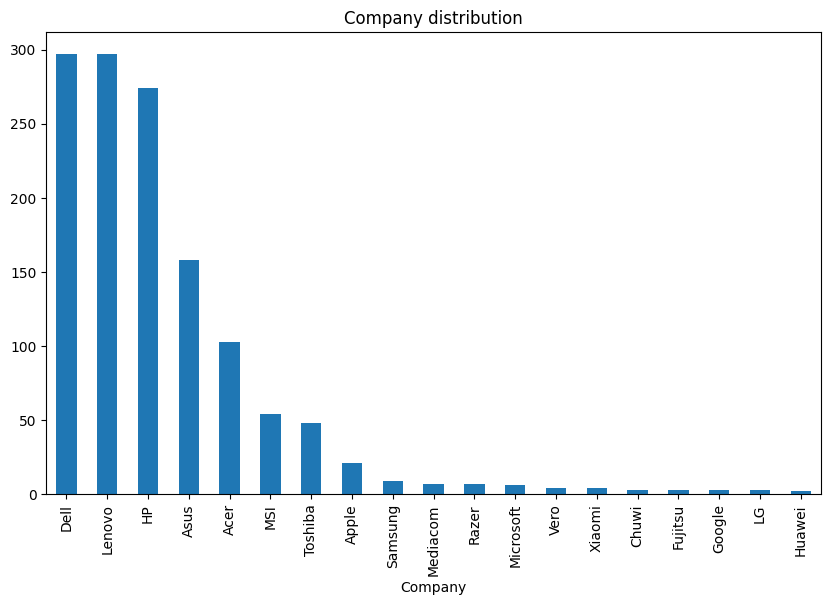

In [ ]:
# company s=distribution
plt.figure(figsize = (10,6))
df['Company'].value_counts().plot(kind = 'bar')
plt.title('Company distribution')

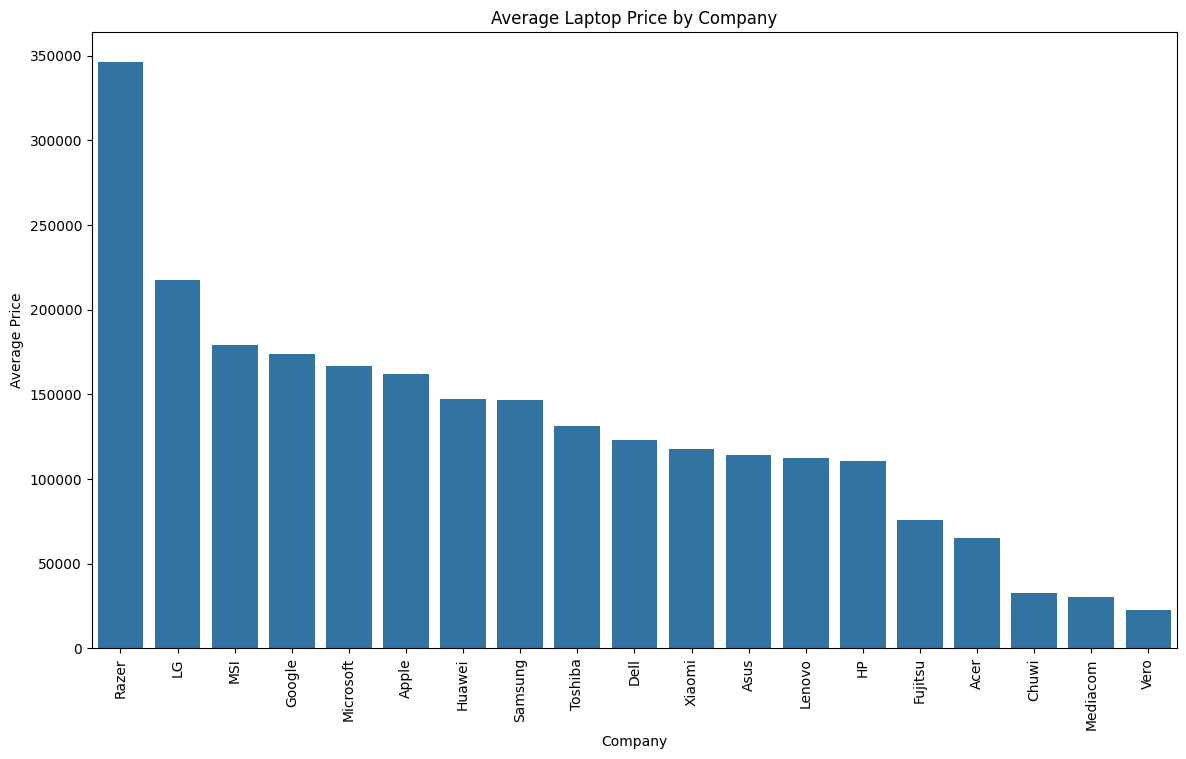

In [ ]:
# Average price by company
avg_price_by_company = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values)
plt.xticks(rotation = 'vertical')
plt.title("Average Laptop Price by Company")
plt.ylabel("Average Price")
plt.show()


Text(0.5, 1.0, 'TypeNme distribution')

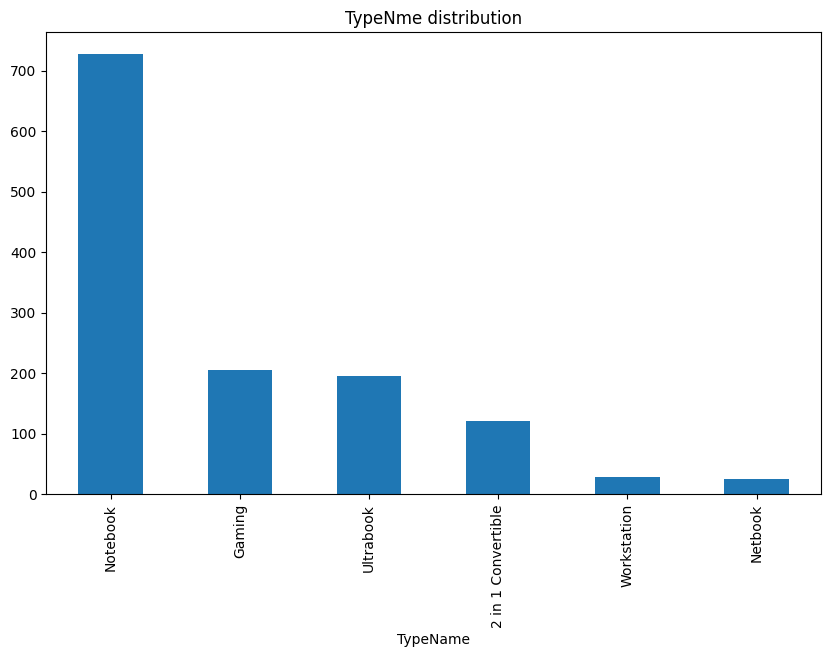

In [ ]:
# Type distribution
plt.figure(figsize = (10,6))
df['TypeName'].value_counts().plot(kind = 'bar')
plt.title('TypeNme distribution')

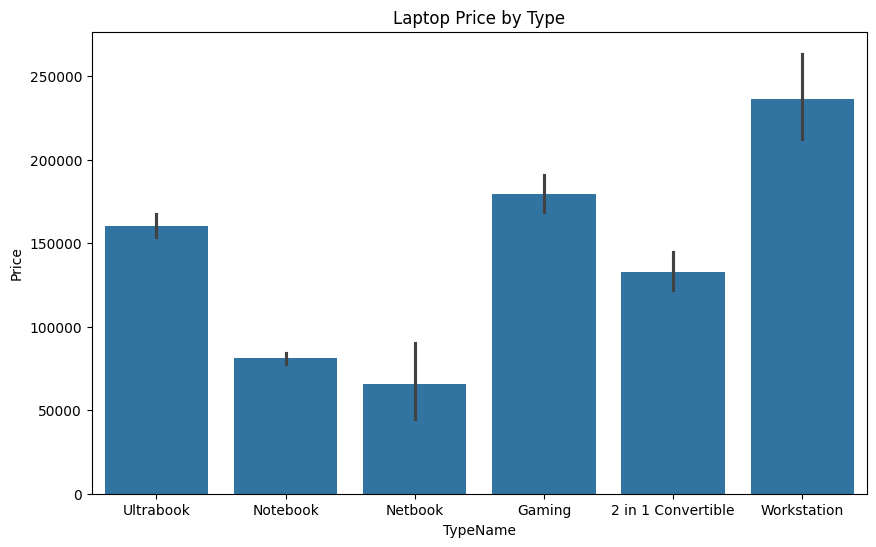

In [ ]:
# Type vs Price
plt.figure(figsize = (10,6))
sns.barplot(x = 'TypeName', y = 'Price', data = df)
plt.title("Laptop Price by Type")
plt.show()

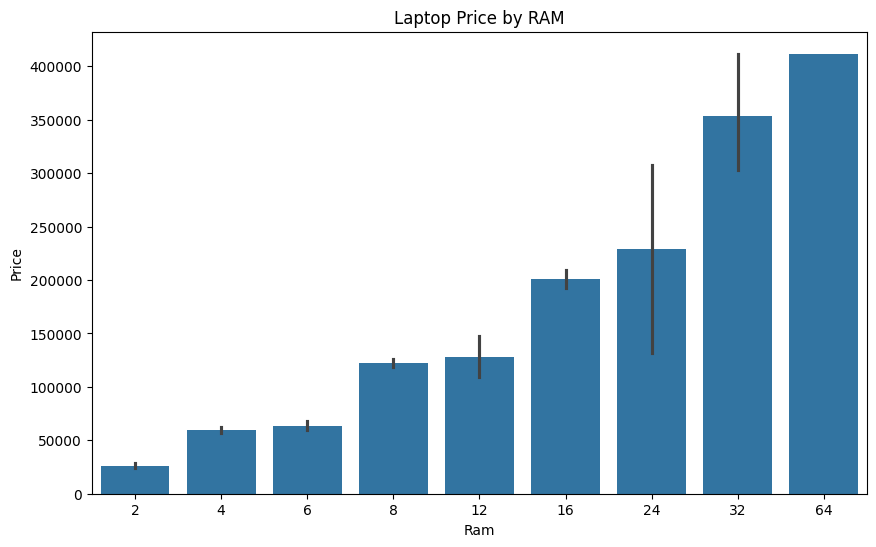

In [ ]:
# RAM vs Price
plt.figure(figsize= (10,6))
sns.barplot(x = 'Ram', y = 'Price', data = df)
plt.title("Laptop Price by RAM")
plt.show()

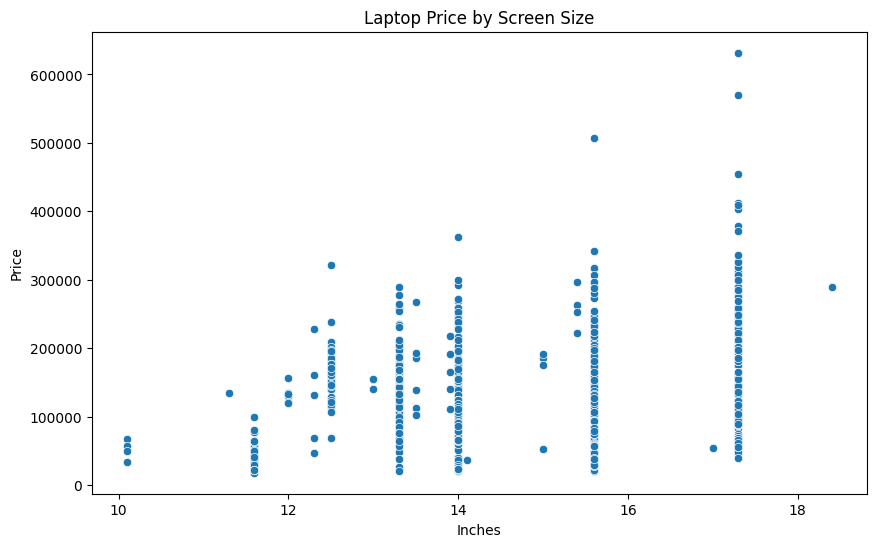

In [ ]:
# screen size vs price
df['Inches'] = pd.to_numeric(df['Inches'], errors = 'coerce')

plt.figure(figsize= (10,6))
sns.scatterplot(x = 'Inches', y = 'Price', data = df)
plt.title("Laptop Price by Screen Size")
plt.show()

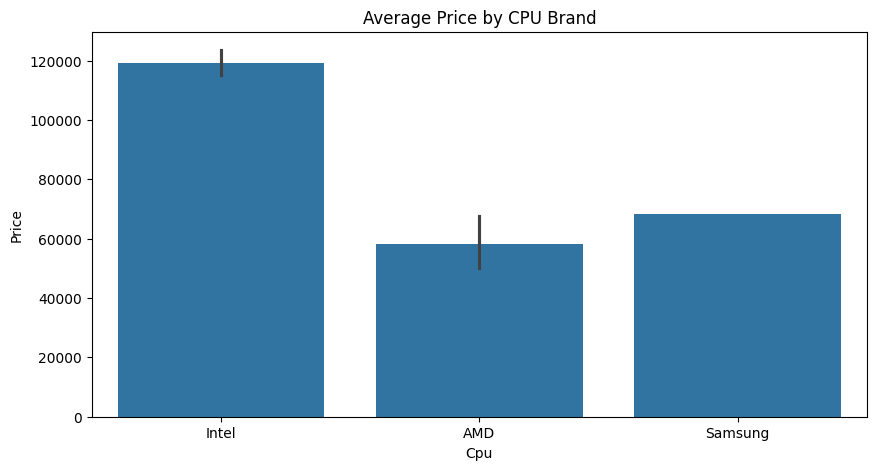

In [ ]:
# CPU influence
plt.figure(figsize=(10,5))
sns.barplot(x = df['Cpu'].apply(lambda x: x.split()[0]), y = df['Price'])
plt.title("Average Price by CPU Brand")
plt.show()


# Feature Engineering

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12



Extraction of ScreenResolution column

In [ ]:
# Extraction of Screenresolution column
# Touchscreen column
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: '1' if 'Touchscreen' in x else '0').astype(int)
# IPS column
df['IPS'] = df['ScreenResolution'].apply(lambda x: '1' if 'IPS' in x else '0').astype(int)

# Resolution (extract width * height )
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

# split into X_res and Y_res
df[['X_res', 'Y_res']] = df['Resolution'].str.split('x', expand=True).astype(int)

# calculate PPI
df['PPI'] = ((df['X_res'] ** 2 + df['Y_res'] ** 2) ** 0.5 / df['Inches']).round(2)


In [ ]:
# show some samples of extracted features
df[['ScreenResolution', 'Touchscreen', 'IPS', 'X_res', 'Y_res', 'PPI']]

,ScreenResolution,Touchscreen,IPS,X_res,Y_res,PPI
0,IPS Panel Retina Display 2560x1600,0,1,2560,1600,226.98
1,1440x900,0,0,1440,900,127.68
2,Full HD 1920x1080,0,0,1920,1080,141.21
3,IPS Panel Retina Display 2880x1800,0,1,2880,1800,220.53
4,IPS Panel Retina Display 2560x1600,0,1,2560,1600,226.98
...,...,...,...,...,...,...
1298,IPS Panel Full HD / Touchscreen 1920x1080,1,1,1920,1080,157.35
1299,IPS Panel Quad HD+ / Touchscreen 3200x1800,1,1,3200,1800,276.05
1300,1366x768,0,0,1366,768,111.94
1301,1366x768,0,0,1366,768,100.45


Since we've already extracted the features we're dropping the ScreenResolution column as it's no longer useful for further processing.


In [ ]:
df.drop(columns=['ScreenResolution','Resolution'], inplace=True)

Drop X_res and Y_res since PPI alredy captures resolutio + size, and they are highly correlated with each other and with PPI.

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()['Price']

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809
PPI,0.473506


In [ ]:
df.drop(columns=['X_res', 'Y_res'], inplace=True)

In [ ]:
df.drop(columns=['Inches'], inplace = True)

In [ ]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1111
1,192


In [ ]:
df['IPS'].value_counts()

,count
IPS,
0,938
1,365


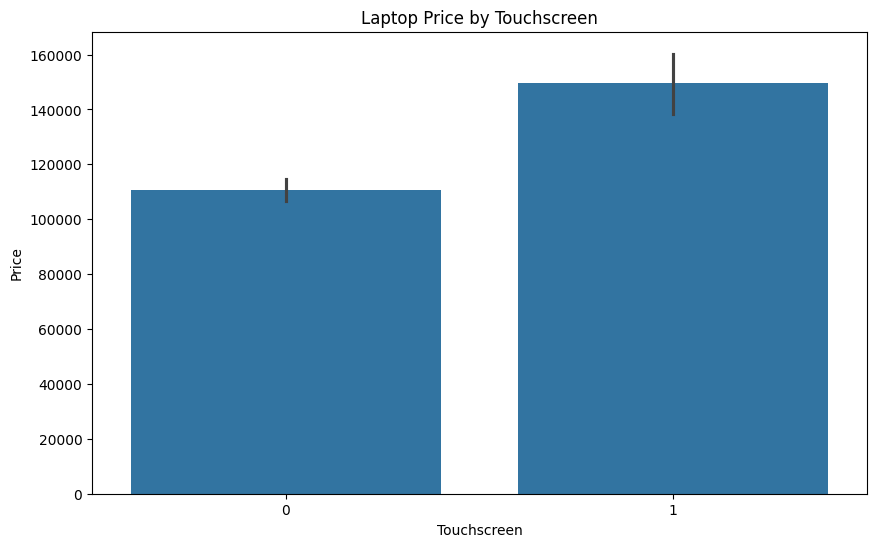

In [ ]:
# Touchscreen vs Price
plt.figure(figsize = (10,6))
sns.barplot(x = 'Touchscreen', y = 'Price', data = df)
plt.title("Laptop Price by Touchscreen")
plt.show()

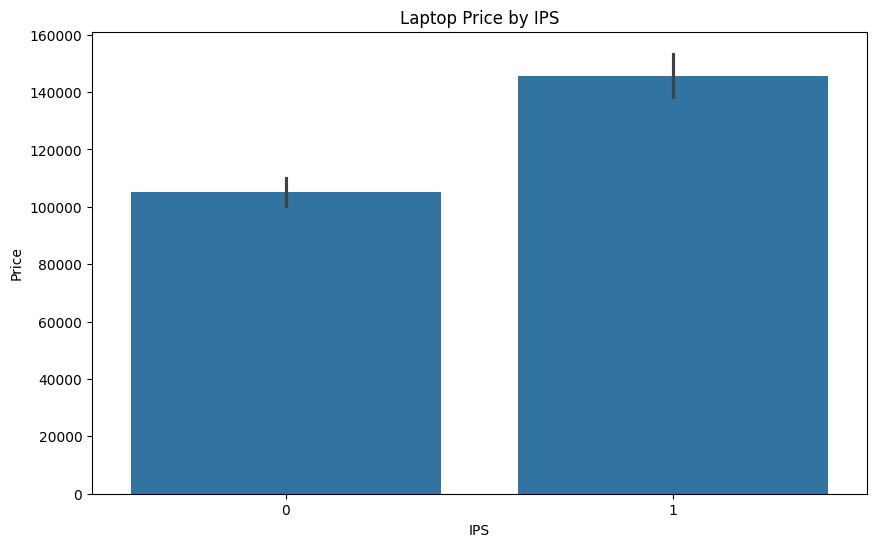

In [ ]:
# IPS vs Price
plt.figure(figsize = (10,6))
sns.barplot(x = 'IPS', y = 'Price', data = df)
plt.title("Laptop Price by IPS")
plt.show()

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


**CPU cleaning and feature extraction**

In [ ]:
# extract the first three words from Cpu brand
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

# funtion to categorize processors
def processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  if text.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

# extract Cpu brand
df['Cpu Brand']=  df['Cpu Name'].apply(processor)

In [ ]:
# show extracted CPU  features
df[['Cpu', 'Cpu Name', 'Cpu Brand']].head(10)

,Cpu,Cpu Name,Cpu Brand
0,Intel Core i5 2.3GHz,Intel Core i5,Intel Core i5
1,Intel Core i5 1.8GHz,Intel Core i5,Intel Core i5
2,Intel Core i5 7200U 2.5GHz,Intel Core i5,Intel Core i5
3,Intel Core i7 2.7GHz,Intel Core i7,Intel Core i7
4,Intel Core i5 3.1GHz,Intel Core i5,Intel Core i5
5,AMD A9-Series 9420 3GHz,AMD A9-Series 9420,AMD Processor
6,Intel Core i7 2.2GHz,Intel Core i7,Intel Core i7
7,Intel Core i5 1.8GHz,Intel Core i5,Intel Core i5
8,Intel Core i7 8550U 1.8GHz,Intel Core i7,Intel Core i7
9,Intel Core i5 8250U 1.6GHz,Intel Core i5,Intel Core i5


In [ ]:
# Now drop Cpu & Cpu Name column
df.drop(columns = ['Cpu', 'Cpu Name'], inplace = True)

In [ ]:
df['Cpu Brand'].value_counts()

,count
Cpu Brand,
Intel Core i7,527
Intel Core i5,423
Other Intel Processor,154
Intel Core i3,136
AMD Processor,63


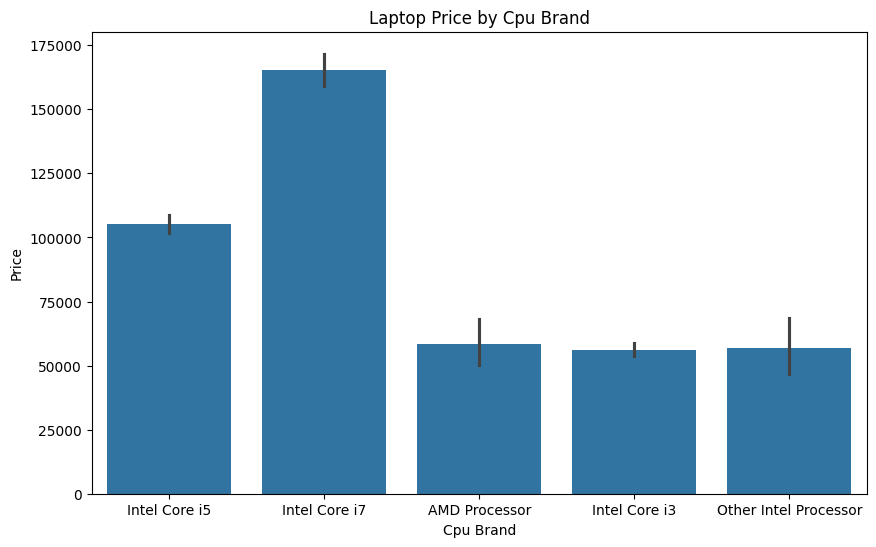

In [ ]:
# plot Cpu brand vs Price
plt.figure(figsize = (10,6))
sns.barplot(x = 'Cpu Brand', y = 'Price', data = df)
plt.title("Laptop Price by Cpu Brand")
plt.show()

In [ ]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,138752.0,0,1,226.98,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,93103.0,0,0,127.68,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,59553.0,0,0,141.21,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,262804.0,0,1,220.53,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,186799.0,0,1,226.98,Intel Core i5


In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


**Memory column extraction & cleaning**

In [ ]:
import re

# Normalize TB -> GB (handle decimals like 1.0TB)
df['Memory'] = df['Memory'].str.replace(r'(\d+)\.0TB', lambda x: str(int(x.group(1)) * 1000) + 'GB', regex=True)
df['Memory'] = df['Memory'].str.replace('TB', '000GB', regex=True)

# Keep "GB" while splitting, only clean '+' spacing
df['Memory'] = df['Memory'].str.replace(r'\s*\+\s*', '+', regex=True)

# Initialize storage type columns
df['HDD'] = 0
df['SSD'] = 0
df['Hybrid'] = 0
df['Flash_Storage'] = 0

# Parse memory
for i, val in enumerate(df['Memory']):
    parts = val.split('+')
    for part in parts:
        num_match = re.search(r'\d+', part)
        if num_match:
            size = int(num_match.group())
            if 'HDD' in part:
                df.loc[i, 'HDD'] += size
            elif 'SSD' in part:
                df.loc[i, 'SSD'] += size
            elif 'Hybrid' in part:
                df.loc[i, 'Hybrid'] += size
            elif 'Flash' in part:  # handles both "Flash Storage" and "FlashStorage"
                df.loc[i, 'Flash_Storage'] += size


In [ ]:
# show some samples of extracted feature
df[['Memory','HDD', 'SSD', 'Hybrid', 'Flash_Storage']].head(10)

,Memory,HDD,SSD,Hybrid,Flash_Storage
0,128GB SSD,0,128,0,0
1,128GB Flash Storage,0,0,0,128
2,256GB SSD,0,256,0,0
3,512GB SSD,0,512,0,0
4,256GB SSD,0,256,0,0
5,500GB HDD,500,0,0,0
6,256GB Flash Storage,0,0,0,256
7,256GB Flash Storage,0,0,0,256
8,512GB SSD,0,512,0,0
9,256GB SSD,0,256,0,0


In [ ]:
# Select only numeric columns for heatmap
numeric_df = df.select_dtypes(include=np.number)

numeric_df.corr()['Price']

,Price
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
PPI,0.473506
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
Flash_Storage,-0.040511


In [ ]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'], inplace=True)

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


**Gpu column Extraction**

In [ ]:
# extract gpu brand and model
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

df['Gpu Model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[1:]))

In [ ]:
df['Gpu Brand'].value_counts()

,count
Gpu Brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


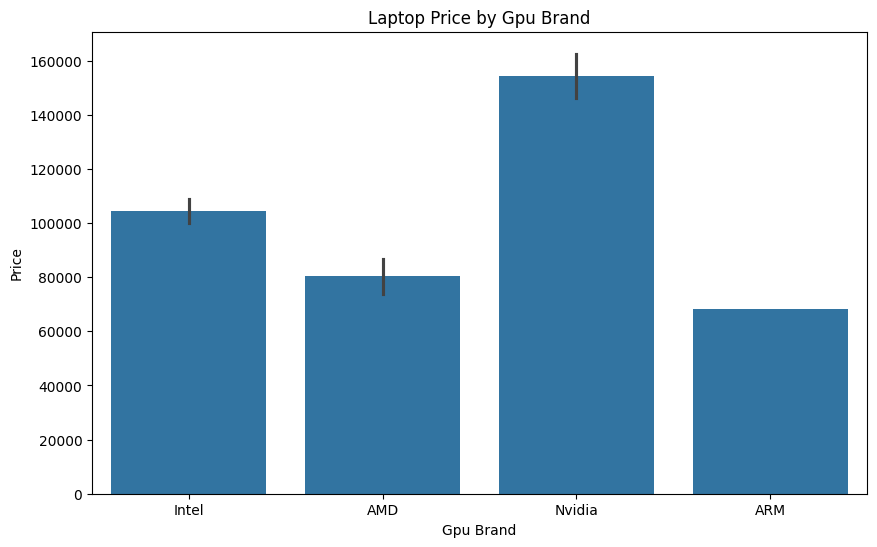

In [ ]:
# plot Gpu brand vs Price
plt.figure(figsize = (10,6))
sns.barplot(x = 'Gpu Brand', y = 'Price', data = df)
plt.title("Laptop Price by Gpu Brand")
plt.show()

In [ ]:
df.drop(columns = 'Gpu', inplace = True)

In [ ]:
df.head(3)

,Company,Product,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,Gpu Model
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,138752.0,0,1,226.98,Intel Core i5,0,128,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,93103.0,0,0,127.68,Intel Core i5,0,0,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,8,No OS,1.86,59553.0,0,0,141.21,Intel Core i5,0,256,Intel,HD Graphics 620


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


**Opsys column extraction**

In [ ]:
# Opsys column extraction
def clean_opsys(os):
  if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
    return 'Windows'
  elif os == 'macOS' or os == 'Mac OS X':
    return 'Mac'
  elif os == 'Linux':
    return 'Linux'
  elif os == 'Chrome OS':
    return 'Chrome'
  else:
    return 'Other/No OS'

df['OS'] = df['OpSys'].apply(clean_opsys)

In [ ]:
df['OS'].value_counts()

,count
OS,
Windows,1125
Other/No OS,68
Linux,62
Chrome,27
Mac,21


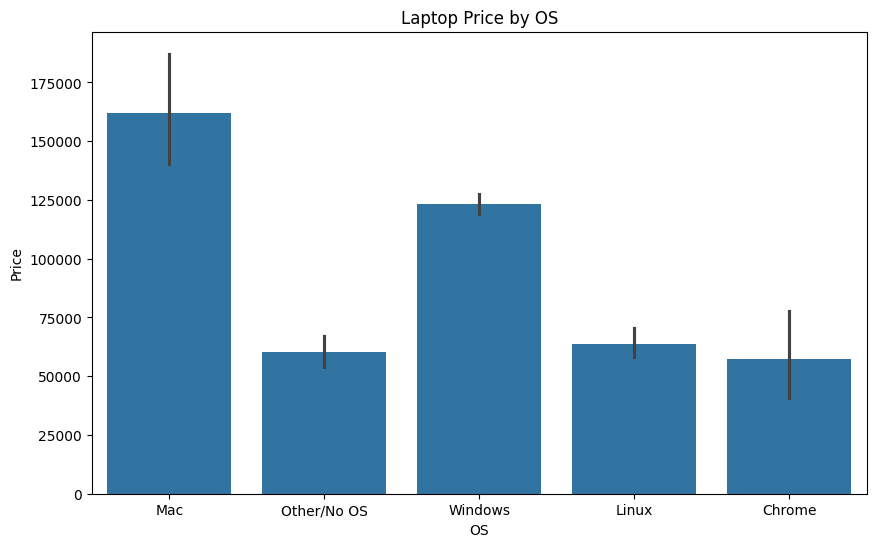

In [ ]:
# plot os vs Price
plt.figure(figsize = (10,6))
sns.barplot(x = 'OS', y = 'Price', data = df)
plt.title("Laptop Price by OS")
plt.show()

In [ ]:
df.drop(columns = 'OpSys', inplace = True)

In [ ]:
df.head(3)

,Company,Product,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,Gpu Model,OS
0,Apple,MacBook Pro,Ultrabook,8,1.37,138752.0,0,1,226.98,Intel Core i5,0,128,Intel,Iris Plus Graphics 640,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,93103.0,0,0,127.68,Intel Core i5,0,0,Intel,HD Graphics 6000,Mac
2,HP,250 G6,Notebook,8,1.86,59553.0,0,0,141.21,Intel Core i5,0,256,Intel,HD Graphics 620,Other/No OS


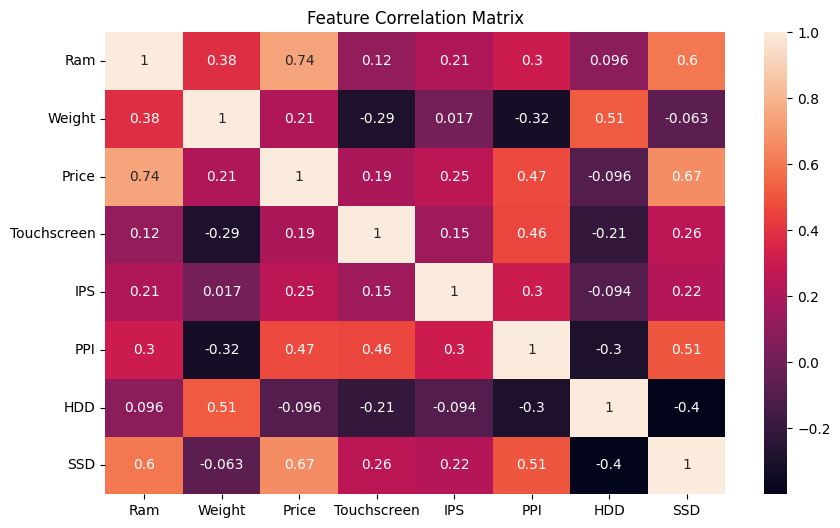

In [ ]:
# Select only numeric columns for heatmap
numeric_df = df.select_dtypes(include=np.number)

# plot heatmap of correlation for numeric columns
plt.figure(figsize = (10,6))
sns.heatmap(numeric_df.corr(), annot = True)
plt.title("Feature Correlation Matrix")
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

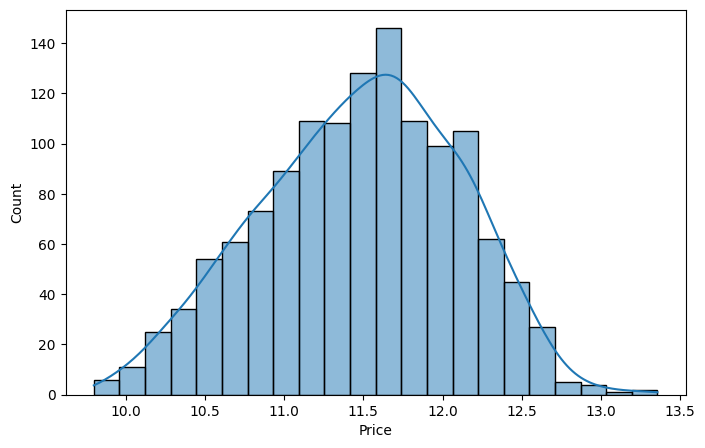

In [ ]:
# Log-transform the target
log_price = np.log(df['Price'])

# Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(log_price, kde=True)

#log-transformed price distribution helps to reduce skewness

# Feature Selection

In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Ram', 'Weight', 'Price',
       'Touchscreen', 'IPS', 'PPI', 'Cpu Brand', 'HDD', 'SSD', 'Gpu Brand',
       'Gpu Model', 'OS'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)

(1042, 14)
(1042,)


# Preprocessing + Modeling via Pipeline

In [ ]:
# Build pipeline with columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Feature groups
cat_cols = ['Company', 'TypeName', 'Cpu Brand', 'Gpu Brand', 'OS']
num_cols = ['Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'HDD', 'SSD']

# Preprocessor
categorical_transformer = OneHotEncoder(drop = 'first', handle_unknown= 'ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('cat', categorical_transformer, cat_cols),
        ('num', numerical_transformer, num_cols)
    ])


# Linear regression model
lr_pipe = Pipeline([
    ("preproceesor", preprocessor),
    ("model", LinearRegression())
])

# Train & Evaluate
lr_pipe.fit(X_train, y_train)

# predict
y_pred_lr = lr_pipe.predict(X_test)

# calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MSE: {mse_lr:.2f}")
print(f"R2: {r2_lr:.2f}")

Linear Regression Metrics:
MSE: 0.06
R2: 0.83


In [ ]:
# Random forest regression model
rf_pipe = Pipeline([
    ("preprocesor", preprocessor),
    ("model", RandomForestRegressor(n_estimators = 200, random_state = 42))
])

# Train & Evaluate
rf_pipe.fit(X_train, y_train)

# predict
y_pred_rf = rf_pipe.predict(X_test)

# calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Metrics:")
print(f"MSE: {mse_rf:.2f}")
print(f"R2: {r2_rf:.2f}")

Random Forest Regression Metrics:
MSE: 0.05
R2: 0.87


In [ ]:
# XGBoost regression model
xgb_pipe = Pipeline([
    ("preprocesor", preprocessor),
    ("model", XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 5, random_state = 42))
])

# Train & Evaluate
xgb_pipe.fit(X_train, y_train)

# predict
y_pred_xgb = xgb_pipe.predict(X_test)

# calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb= r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Metrics:")
print(f"MSE: {mse_xgb:.2f}")
print(f"R2: {r2_xgb:.2f}")

XGBoost Regression Metrics:
MSE: 0.04
R2: 0.89


**Feature Importance**

/tmp/ipython-input-4270610868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


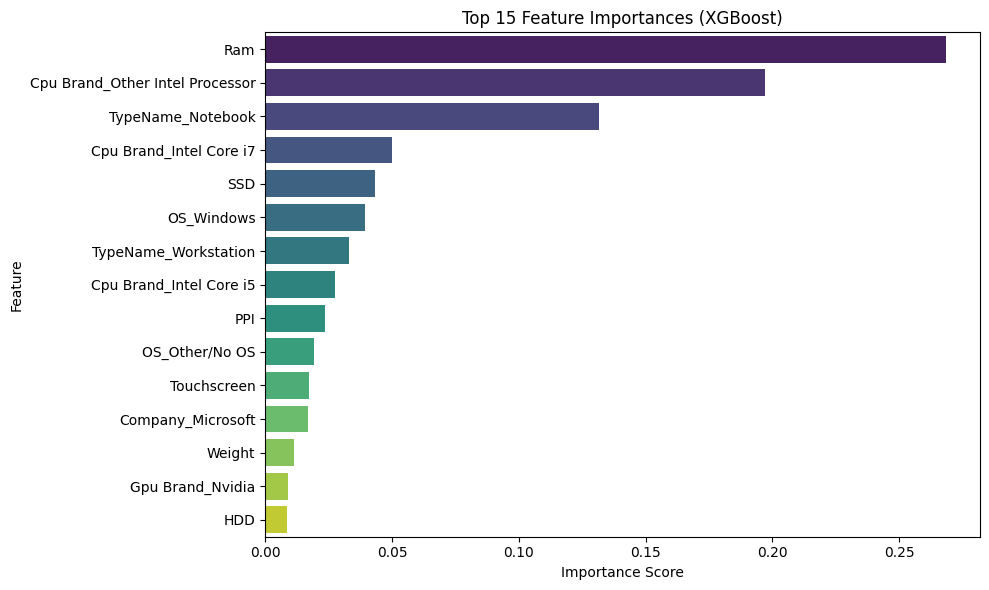

In [ ]:
# Get trained XGBoost model from pipeline
xgb_model = xgb_pipe.named_steps['model']

# Get transformed feature names
ohe = preprocessor.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_cols)
# Combine with numeric features
feature_names = np.concatenate([ohe_features, num_cols])

# Get feature importance from XGBoost
feature_importances = xgb_model.feature_importances_

# Put into DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort and select top 15
feat_imp = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#Model Deployement

In [ ]:
# save the model
import pickle
pickle.dump(xgb_pipe, open('xgb_pipe.pkl', 'wb'))

print("Model saved as Laptop Price Predictor")

Model saved as Laptop Price Predictor


In [ ]:
# load the model
model = pickle.load(open('xgb_pipe.pkl', 'rb'))